## Goals

1. To identify if I can learn anything from my habit tracker about my life in 2020. 
2. By doing (1) to learn how to deal with real-world data and prepare a CNN 

### Steps

1. Import image
2. Work out how to break it apart into the different grids
3. Split into test and train data sets
4. Label the test data set
5. Use CNNs to work out whether things are ticks, crosses, or numbers

### Potential diffculties

* Will the data set be large enough?
* Different writing types: ticks, crosses, numbers, dashes, blanks
* Need to also attribute the date to each observation

# 1. Import the image

In [313]:
import PIL.Image # python imaging library
import os, shutil # used for operations on files (os for files, shutil for directories)
import numpy as np

In [314]:
from PIL import Image 

In [315]:
im = Image.open("06-06-2020_19_06_2020.jpg") 

In [316]:
print(im.size)
im_r = im.rotate(90) # this seems to only be a view on the image
im_r.save('im_r.jpg')
print(im_r.size)

(1358, 2200)
(1358, 2200)


In [317]:
im_t = im.transpose(PIL.Image.ROTATE_90) # this actually changes it

In [318]:
im_t.size

(2200, 1358)

(1100, 679)


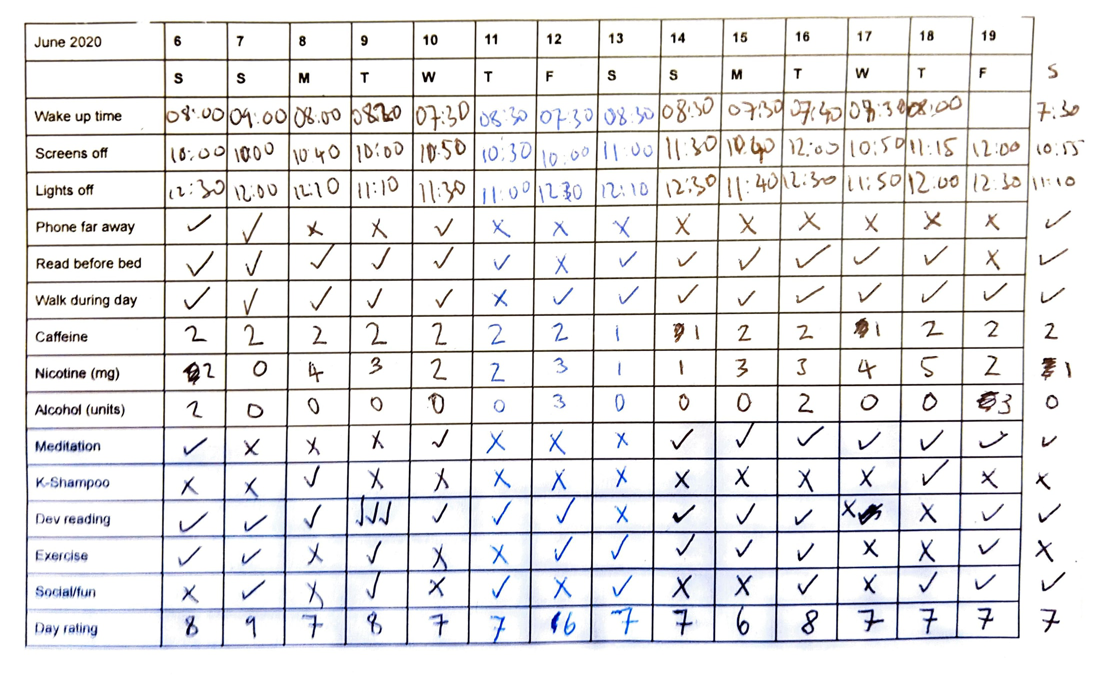

In [319]:
# Resize image https://pillow.readthedocs.io/en/stable/reference/Image.html
(width, height) = (im_t.width // 2, im_t.height // 2)
im_t_resized = im_t.resize((width, height))
print(im_t_resized.size)
im_t_resized

# 2. Break image into different tiles

In [320]:
# Ok, next step is to crop the image into different bits
imr = im_t_resized 
print(imr.size)
# im_crop = imr.crop((left, upper, right, lower)) 
im_crop = imr.crop((1, 205, 1030, 650)) # think of this as the lines

(1100, 679)


In [321]:
# ok next step is to make some kind of loop to get each row dimensions
row_height = (1030-205)/12
rows = []
i = 205
while i <= 1030:
    rows.append(i)
    i = i + 68.75
print(rows)
print(len(rows))

[205, 273.75, 342.5, 411.25, 480.0, 548.75, 617.5, 686.25, 755.0, 823.75, 892.5, 961.25, 1030.0]
13


In [322]:
print(rows[0])
print(imr.size)

205
(1100, 679)


In [323]:
grid = np.zeros((12,2))
i = 0
while i < len(rows)-1: 
    grid[i,0] = rows[i] # I confused = (assignment) with == (equality test operator)
    grid[i,1] = rows[i+1]
    i = i + 1

In [324]:
print(grid)

[[ 205.    273.75]
 [ 273.75  342.5 ]
 [ 342.5   411.25]
 [ 411.25  480.  ]
 [ 480.    548.75]
 [ 548.75  617.5 ]
 [ 617.5   686.25]
 [ 686.25  755.  ]
 [ 755.    823.75]
 [ 823.75  892.5 ]
 [ 892.5   961.25]
 [ 961.25 1030.  ]]


In [325]:
row_names = [ 'phone', 'read', 'walk', 'caffeine', 'nicotine', 'alcohol', 'meditation', 
             'k-shampoo', 'dev', 'exercise', 'social/fun', 'rating' ]

In [326]:
# now I want to make a loop through row names, which assigns each variable to them
# expect the next step is to loop through 

In [327]:
im_crop.size

(1029, 445)

In [328]:
# im_crop = imr.crop((left, upper, right, lower)) 
caffeine = im_crop.crop((1,113,1028,141))

In [329]:
caffeine

In [330]:
# Each row is 26 pixels high
caffeine.size

(1027, 28)

In [331]:
letter = caffeine.crop((181,0,209,28))

In [332]:
letter

In [333]:
letter.size

(28, 28)

# 3. Import MNIST and use this to recognise the numbers
* https://www.digitalocean.com/community/tutorials/how-to-build-a-neural-network-to-recognize-handwritten-digits-with-tensorflow
* https://www.youtube.com/watch?v=rml9oBQT8rw

In [334]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [335]:
(training_data, training_labels), (test_data, test_labels) = mnist.load_data()
training_data, test_data = training_data / 255, test_data / 255

In [336]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(), # changed this line
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [337]:
model.fit(training_data, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4300 - accuracy: 0.8802
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1205 - accuracy: 0.9648: 2s - los
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0762 - accuracy: 0.9777
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0541 - accuracy: 0.9838
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0457 - accuracy: 0.9865


In [338]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9758


[0.07525382190942764, 0.9757999777793884]

# 4. Using MNIST on the example letter

In [339]:
# My letter
letter.save('letter.png')

In [340]:
# Learning some stuff about what the training data looks like
print(test_data[0].shape) # This is based on a 28*28 grid
print(test_data[0].dtype)
print(type(test_data[0]))

(28, 28)
float64
<class 'numpy.ndarray'>


### Converting the images of the handwritten numbers to the right format

In [341]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
image = tf.keras.preprocessing.image.load_img('/Users/bendixon/Documents/GitHub/climate/WS4/letter.png', 
                                             target_size=(28,28), color_mode='grayscale')
input_arr = keras.preprocessing.image.img_to_array(image)
input_arr = input_arr / 255
sq_input_arr = np.squeeze(input_arr, axis=None) 
sq_input_arr = np.array([sq_input_arr])  # Convert single image to a batch.
predictions = model.predict(sq_input_arr)

In [342]:
# Testing out turning the array back into an image
tf.keras.preprocessing.image.array_to_img(
    input_arr, data_format=None, scale=True, dtype=None
)

In [343]:
values = np.arange(0,10)

<BarContainer object of 10 artists>

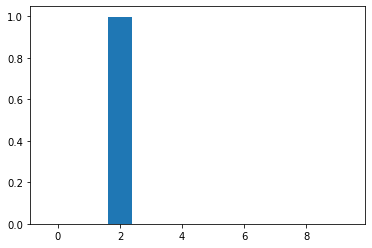

In [344]:
matplotlib.pyplot.bar(values,predictions.squeeze())

In [345]:
predictions.squeeze().shape

(10,)

In [346]:
print('Info about the test dataset')
print(test_data[0].shape) # This is based on a 28*28 grid
print(test_data[0].dtype)
print(type(test_data[0]))
print(input_arr.shape) # This is based on a 28*28 grid
print(input_arr.dtype)
print(type(input_arr))
print(sq.shape) # This is based on a 28*28 grid
print(sq.dtype)
print(type(sq))

Info about the test dataset
(28, 28)
float64
<class 'numpy.ndarray'>
(28, 28, 1)
float32
<class 'numpy.ndarray'>
(28, 28)
float32
<class 'numpy.ndarray'>
